In [1]:
from sklearn.ensemble import RandomForestClassifier as RF
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import sklearn.linear_model as skl
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

In [3]:
dataset3 = pd.read_csv('dataset3 (2assign).csv')
Y3=dataset3['target']
X3=dataset3.drop(['target'],axis=1)

In [5]:
dataset1 = pd.read_csv('dataset1 (2assign).csv')
Y1=dataset1['target']
X1=dataset1.drop(['target'],axis=1)

In [7]:
dataset2 = pd.read_csv('dataset2 (2assign).csv')
Y2=dataset2['target']
X2=dataset2.drop(['target'],axis=1)

In [9]:
dataset4 = pd.read_csv('dataset4 (2assign).csv')
Y4=dataset4['target']
X4=dataset4.drop(['target'],axis=1)

In [11]:
dataset5 = pd.read_csv('dataset5 (2assign).csv')
Y5=dataset5['target']
X5=dataset5.drop(['target'],axis=1)

In [13]:
def RandomForest(X,Y,X_test=None):
    rfc = RF(n_estimators=500, random_state=2025, max_features=X.shape[1])
    rfc.fit(X,Y)
    if X_test is not None:
        probs_test = rfc.predict_proba(X_test)
        positive_probs_test = probs_test[:, 1]
        negative_probs_test = probs_test[:, 0]
        negative_probs_test[negative_probs_test == 0] = 1e-9
        positive_probs_test[positive_probs_test == 0] = 1e-9
        log_odds_test = np.log(positive_probs_test/negative_probs_test)
        log_odds_test[positive_probs_test == 1] = 99 
        log_odds_test[positive_probs_test == 1e-9] = -99
        return log_odds_test
    

In [15]:
def LogisticRegression(X,Y,X_test=None):
    log_reg = skl.LogisticRegression(random_state=0,penalty=None, solver='lbfgs')
    log_reg.fit(X,Y)
    if X_test is not None:
        probs_test = log_reg.predict_proba(X_test)
        positive_probs_test = probs_test[:, 1]
        negative_probs_test = probs_test[:, 0]
        negative_probs_test[negative_probs_test == 0] = 1e-9
        positive_probs_test[positive_probs_test == 0] = 1e-9
        log_odds_test = np.log(positive_probs_test/negative_probs_test)
        log_odds_test[positive_probs_test == 1] = 99 
        log_odds_test[positive_probs_test == 1e-9] = -99
        #returns log odds as a vector with value for each x_test
        return log_odds_test

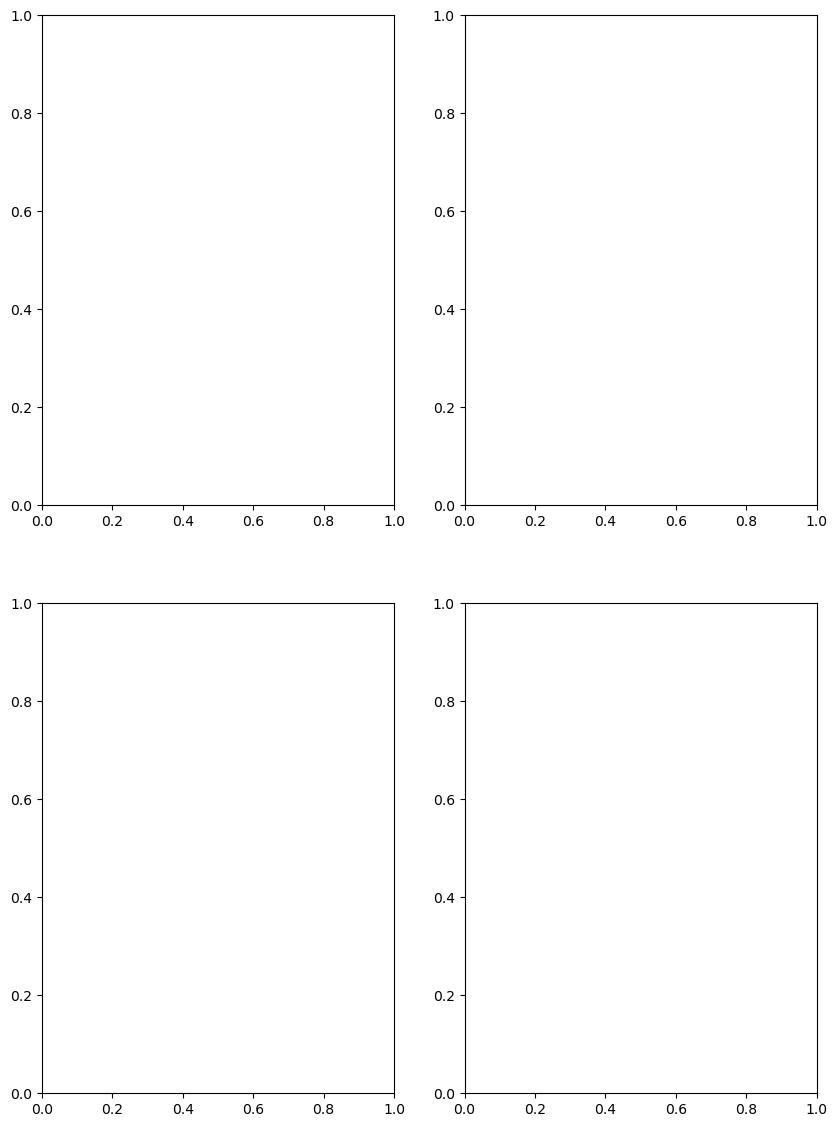

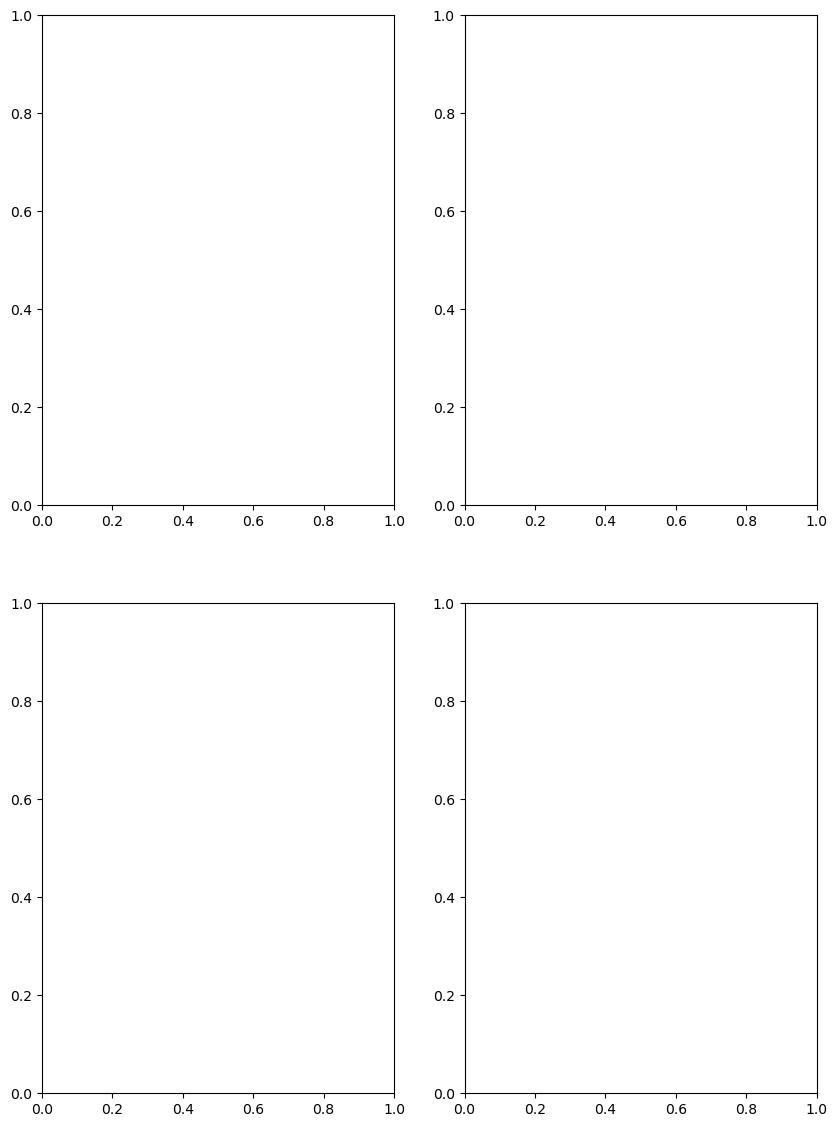

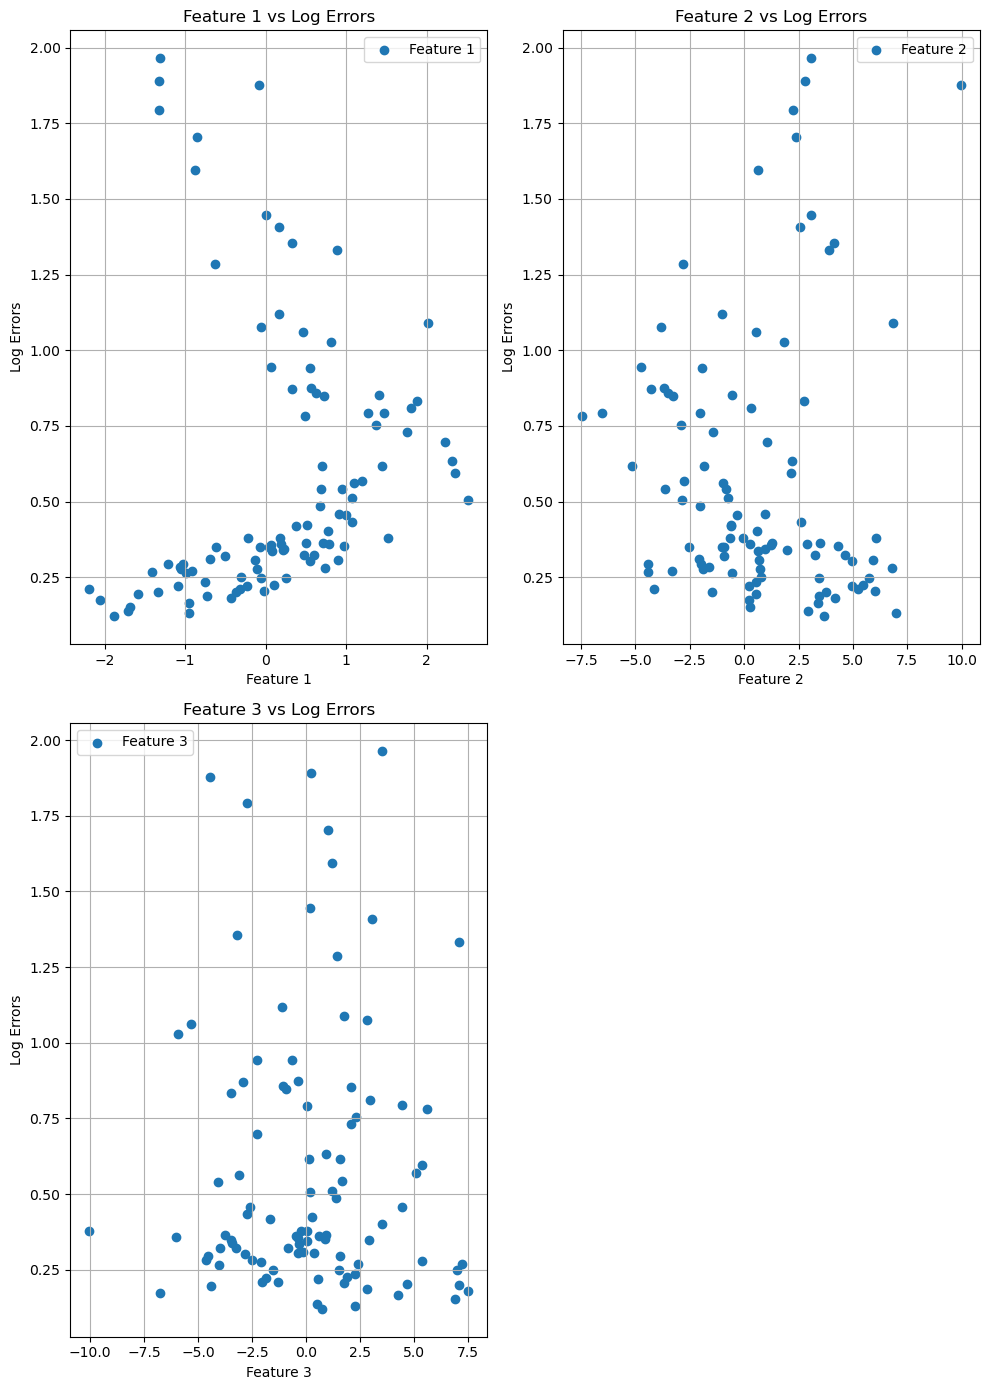

In [17]:
#Check if the there is a correlation of features with log-errors (checking for endogeneity)
features=[]
for i in range(X2.shape[1]):
    features.append(X2.iloc[:, i])
    log_odds_test = LogisticRegression(X2,Y2,X2)
    log_errors = -(Y2 * log_odds_test- np.log(1 + np.exp(log_odds_test)))
    num_rows = int(np.ceil(X2.shape[1] / 2))
    fig, axs = plt.subplots(2, 2, figsize=(10, 14))
    axs = axs.flatten()
for i in range(X2.shape[1]):
    axs[i].scatter(X2.iloc[:, i], log_errors, label=f"Feature {i+1}", marker='o')
    axs[i].set_title(f"Feature {i+1} vs Log Errors")
    axs[i].set_xlabel(f"Feature {i+1}")
    axs[i].set_ylabel("Log Errors")
    axs[i].legend()
    axs[i].grid(True)
    

for j in range(X2.shape[1], len(axs)):
    fig.delaxes(axs[j])
    
plt.tight_layout()
plt.show()

In [19]:
def QuadraticDiscriminant(X,Y,X_test=None):
    qda = QDA(store_covariance=True)
    qda.fit(X, Y)
    print("Covariance matrices:")
    for i, cov_matrix in enumerate(qda.covariance_):
        print(f"Class {i} covariance matrix:\n{cov_matrix}")
    if X_test is not None:
        probs_test = qda.predict_proba(X_test)
        positive_probs_test = probs_test[:, 1]
        negative_probs_test = probs_test[:, 0]
        negative_probs_test[negative_probs_test == 0] = 1e-9
        positive_probs_test[positive_probs_test == 0] = 1e-9
        log_odds_test = np.log(positive_probs_test/negative_probs_test)
        log_odds_test[positive_probs_test == 1] = 99 
        log_odds_test[positive_probs_test == 1e-9] = -99
        #returns log odds as a vector with value for each x_test
        return log_odds_test

In [21]:
def LDiscriminant(X,Y,X_test=None):
    lda = LDA(store_covariance=True)
    lda.fit(X, Y)
    if X_test is not None:
        probs_test = lda.predict_proba(X_test)
        positive_probs_test = probs_test[:, 1]
        negative_probs_test = probs_test[:, 0]
        negative_probs_test[negative_probs_test == 0] = 1e-9
        positive_probs_test[positive_probs_test == 0] = 1e-9
        log_odds_test = np.log(positive_probs_test/negative_probs_test)
        log_odds_test[positive_probs_test == 1] = 99 
        log_odds_test[positive_probs_test == 1e-9] = -99
        #returns log odds as a vector with value for each x_test
        return log_odds_test

In [25]:
def plot_log_odds(X, Y, function):
    features=[]
    for i in range(X.shape[1]):
        features.append(X.iloc[:, i])
    log_odds = function(X,Y,X_test=X)
    num_rows = int(np.ceil(X.shape[1] / 2))
    fig, axs = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axs = axs.flatten()  # Flatten to easily index subplots
    
    # Plot each feature in its own subplot
    for i in range(X.shape[1]):
        axs[i].scatter(X.iloc[:, i], log_odds, label=f"Feature {i+1}", marker='o')
        axs[i].set_title(f"Feature {i+1} vs Log Odds")
        axs[i].set_xlabel(f"Feature {i+1}")
        axs[i].set_ylabel("Log Odds")
        axs[i].legend()
        axs[i].grid(True)
    
    # Hide unused subplots if the number of features is odd
    for j in range(X.shape[1], len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.show()

Covariance matrices:
Class 0 covariance matrix:
[[ 9.60713561e-01  5.28460287e-01  4.13686607e-01  2.95385295e-01
   2.33981793e-01  1.74125351e-01  9.31074908e-02  2.24940780e-01
   2.51316670e-01  3.28272941e-01  1.74058418e-01  2.69481242e-01
   2.65112993e-01  1.29969309e-01  7.41031299e-02  1.34463014e-01
  -9.59147683e-02 -1.89931189e-02  3.09931287e-02  9.65368918e-02
   2.23757140e-01  8.84335322e-02 -1.47680927e-01 -1.54475016e-01
   2.27532024e-03  4.25006400e-02  2.71117942e-03  1.66471030e-01
   1.85699509e-01 -6.09325408e-02]
 [ 5.28460287e-01  6.49347215e-01  5.54869370e-01  5.48056453e-01
   3.79158630e-01  3.14234235e-01  1.99611648e-01  3.24657796e-01
   2.84037505e-01  1.93613816e-01  1.71683908e-01  1.68106550e-01
   1.99663051e-01 -2.50154384e-02  2.71197167e-02 -1.26926700e-01
  -2.08161446e-01 -3.14360962e-02 -4.76998780e-02 -3.63659684e-02
   1.30214716e-01  1.65995341e-02 -1.06106483e-01 -2.15023309e-01
  -6.43832746e-02 -3.36602226e-02 -6.87711330e-02 -2.434880

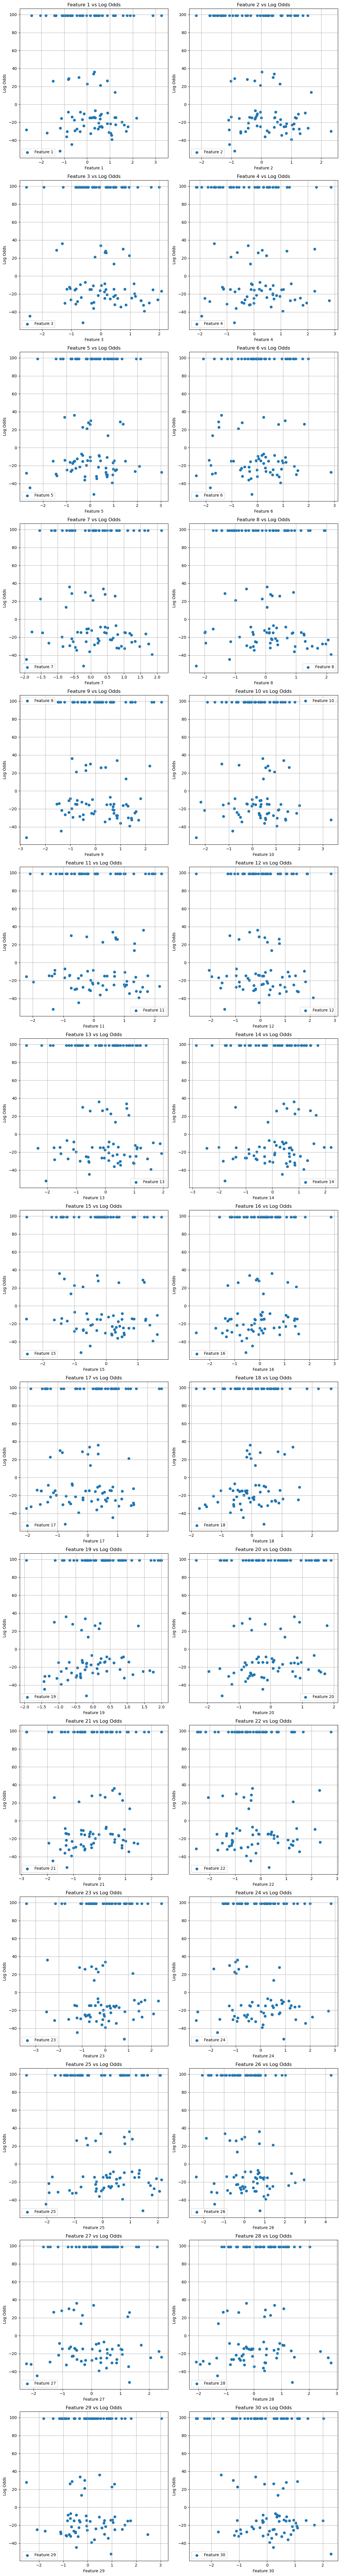

In [27]:
plot_log_odds(X1, Y1, QuadraticDiscriminant)

In [86]:
QuadraticDiscriminant(X2, Y2, X2)

Covariance matrices:
Class 0 covariance matrix:
[[ 1.08028398  0.43732415  0.0636066 ]
 [ 0.43732415  9.69787496 -0.81189298]
 [ 0.0636066  -0.81189298 12.89522479]]
Class 1 covariance matrix:
[[ 1.04660238 -0.5612656   0.15364887]
 [-0.5612656  14.39440061 -2.15222494]
 [ 0.15364887 -2.15222494  9.41806604]]


array([-1.97711433, -0.82235468, -0.00473513, -0.49291236, -1.27904127,
       -0.81465629, -2.28779061, -0.9534942 , -1.44808852,  0.08864844,
       -0.46575101, -0.65193558, -0.60541744, -1.13518143, -1.21487909,
       -0.76966441, -1.62560978, -2.51768939,  0.10935433, -0.39184253,
       -1.65792683, -1.14175586, -0.2326485 , -1.48605063, -0.02384903,
       -1.12616071, -0.59495132, -1.76187704, -0.83965192, -0.9076188 ,
       -1.87467558, -0.74875891, -0.12424097, -1.07701452, -1.47293112,
       -0.44955275, -1.01857373, -1.40019042, -1.09618749, -0.89042258,
       -0.99909579, -1.40415398, -0.00668029, -0.95159219, -1.46786241,
       -0.85817379, -0.65632312, -1.90220098, -1.02018431,  0.11102968,
       -1.36245986, -1.45592113, -0.76348166, -0.84818842,  0.89502986,
       -0.36642053, -0.25195573, -1.38233567, -1.72730657, -2.22523271,
       -0.25292275,  1.08908118, -1.03112883, -0.74793073, -1.5686958 ,
       -0.84245074, -0.89882798, -0.88168005, -2.37286796, -1.30

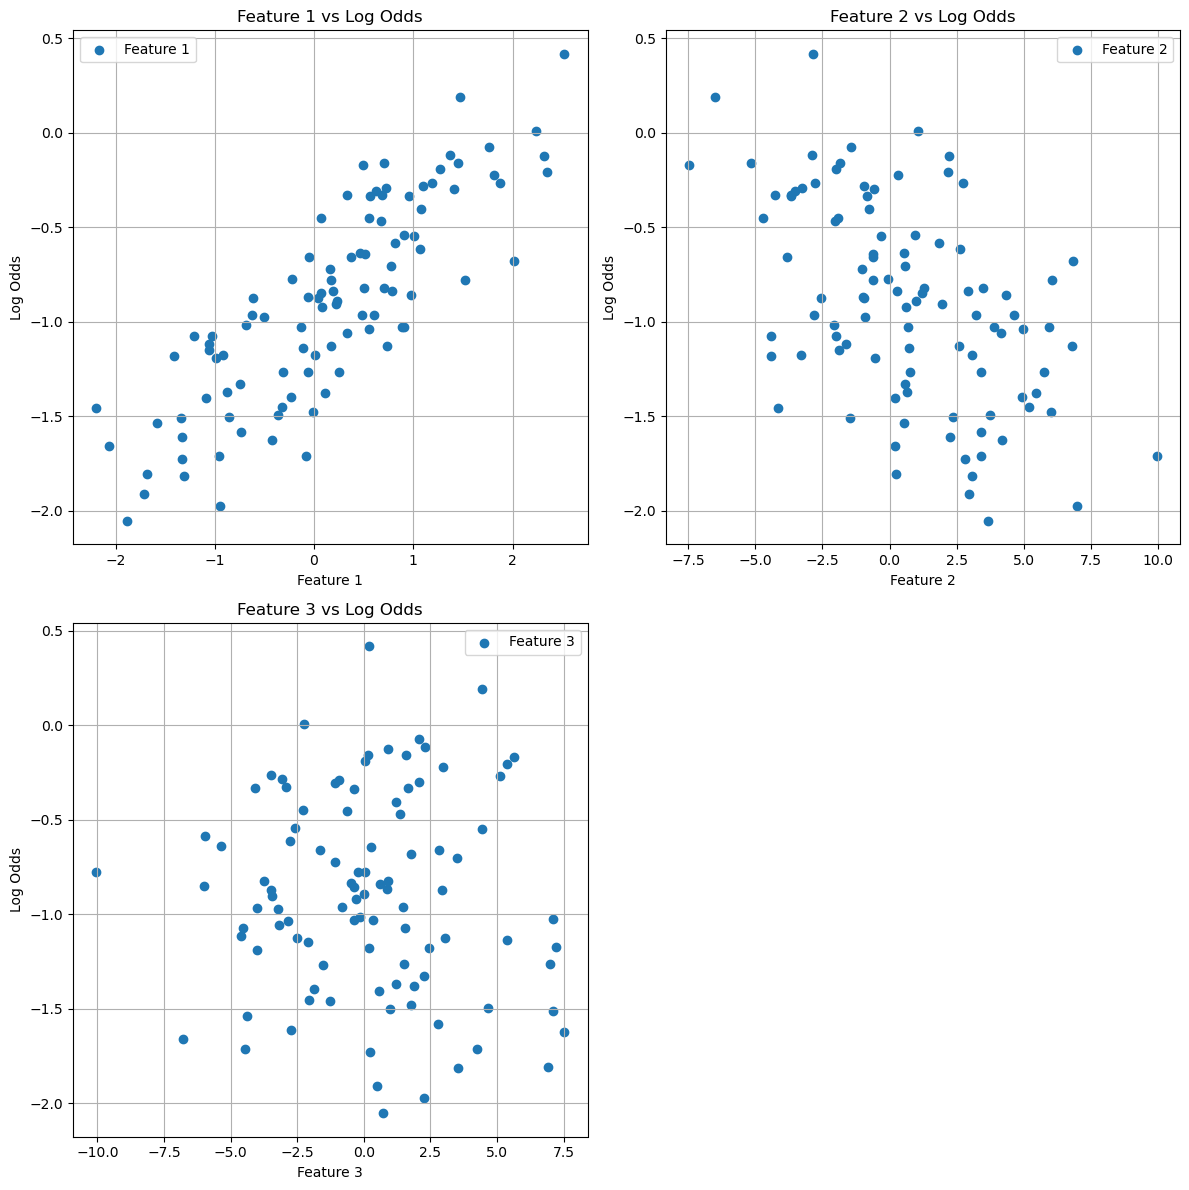

In [36]:
plot_log_odds(X2, Y2, LogisticRegression)

In [332]:
print(X4.shape)

(100, 10)


In [29]:
def training_logistic_error_comparsion(X,Y):
    log_odds_RF = RandomForest(X, Y, X_test=X)
    log_error_RF = -np.mean(Y * log_odds_RF - np.log(1 + np.exp(log_odds_RF)))
    log_odds_LR = LogisticRegression(X, Y, X_test=X)
    log_error_LR = -np.mean(Y * log_odds_LR - np.log(1 + np.exp(log_odds_LR)))
    log_odds_QDA = QuadraticDiscriminant(X, Y, X_test=X)
    log_error_QDA = -np.mean(Y * log_odds_QDA - np.log(1 + np.exp(log_odds_QDA)))
    print(f"Training log error for Random Forest: {log_error_RF}")
    print(f"Training log error for Logistic Regression: {log_error_LR}")
    print(f"Training log error for Quadratic Discriminant Analysis: {log_error_QDA}")

In [31]:
training_logistic_error_comparsion(X1,Y1)
#Random Forest wins, QDA clearly overfits, because there are 30 features which is a lot compared to n=100

Covariance matrices:
Class 0 covariance matrix:
[[ 9.60713561e-01  5.28460287e-01  4.13686607e-01  2.95385295e-01
   2.33981793e-01  1.74125351e-01  9.31074908e-02  2.24940780e-01
   2.51316670e-01  3.28272941e-01  1.74058418e-01  2.69481242e-01
   2.65112993e-01  1.29969309e-01  7.41031299e-02  1.34463014e-01
  -9.59147683e-02 -1.89931189e-02  3.09931287e-02  9.65368918e-02
   2.23757140e-01  8.84335322e-02 -1.47680927e-01 -1.54475016e-01
   2.27532024e-03  4.25006400e-02  2.71117942e-03  1.66471030e-01
   1.85699509e-01 -6.09325408e-02]
 [ 5.28460287e-01  6.49347215e-01  5.54869370e-01  5.48056453e-01
   3.79158630e-01  3.14234235e-01  1.99611648e-01  3.24657796e-01
   2.84037505e-01  1.93613816e-01  1.71683908e-01  1.68106550e-01
   1.99663051e-01 -2.50154384e-02  2.71197167e-02 -1.26926700e-01
  -2.08161446e-01 -3.14360962e-02 -4.76998780e-02 -3.63659684e-02
   1.30214716e-01  1.65995341e-02 -1.06106483e-01 -2.15023309e-01
  -6.43832746e-02 -3.36602226e-02 -6.87711330e-02 -2.434880

In [35]:
#dataset2
training_logistic_error_comparsion(X2,Y2)
#LDA or QDA to utilize normal distribution assumption. Also features are uncorrelated, so there is no need for decorrelation in RF. We pick LDA, because,
# from the information about the dataset we know that "within each target class, 
# each feature follows a normal distribution with variances of either 1 or 10." 
# Looking at estimated covariance matrixes below, if we round each estimate to 1 or 10, it results
# in 2 covariance matrixes that are the same in both classes -> LDA will give best results

Covariance matrices:
Class 0 covariance matrix:
[[ 1.08028398  0.43732415  0.0636066 ]
 [ 0.43732415  9.69787496 -0.81189298]
 [ 0.0636066  -0.81189298 12.89522479]]
Class 1 covariance matrix:
[[ 1.04660238 -0.5612656   0.15364887]
 [-0.5612656  14.39440061 -2.15222494]
 [ 0.15364887 -2.15222494  9.41806604]]
Training log error for Random Forest: 0.15475021812283052
Training log error for Logistic Regression: 0.5835281666913354
Training log error for Quadratic Discriminant Analysis: 0.5667133872290312


In [318]:
#dataset3
training_logistic_error_comparsion(X3,Y3)
#RF - high nonlinearity

Training log error for Random Forest: 0.17960357193172535
Training log error for Logistic Regression: 0.6601100220665626
Training log error for Quadratic Discriminant Analysis: 0.5864461214238971


In [322]:
#dataset4
training_logistic_error_comparsion(X4,Y4)
# Logistic Regression is used for linear decision boundaries,
# suitable when features might not be normally distributed but LDA's linear approach is effective
# training error is bigger for it, because it reduces variance and reduces noise, by making use of the fact that log odds are linear

Training log error for Random Forest: 0.16987847151332647
Training log error for Logistic Regression: 0.4931300896869888
Training log error for Quadratic Discriminant Analysis: 0.32139496605540624


In [324]:
#dataset5
training_logistic_error_comparsion(X5,Y5)
# Features follow a joint normal distribution within each class. So each class has a multivariate normal distribution. 
# If that's the case, then LDA or QDA would be appropriate. If the covariance matrices are the same across classes, Logistic Regression is better, 
# since then there is a linear relationship between log odds and features. (we dont have an option to use LDA)
# If they are different, QDA.
# they are different so QDA

Training log error for Random Forest: 0.13117373725693815
Training log error for Logistic Regression: 0.6018561219247972
Training log error for Quadratic Discriminant Analysis: 0.31434350734497907


In [384]:
QuadraticDiscriminant(X5,Y5)

Covariance matrices:
Class 0 covariance matrix:
[[ 1.32515647 -0.03198712 -0.00437887]
 [-0.03198712  1.02999132  0.08639237]
 [-0.00437887  0.08639237  1.38618406]]
Class 1 covariance matrix:
[[0.80800857 0.74225305 0.53066017]
 [0.74225305 0.79710656 0.54352637]
 [0.53066017 0.54352637 0.575437  ]]


In [84]:
Y1_pred_log_odds = RandomForest(X1, Y1, X_test=X1)
Y2_pred_log_odds = LDiscriminant(X2, Y2, X_test = X2)
Y3_pred_log_odds = RandomForest(X3, Y3, X_test=X3)
Y4_pred_log_odds = LogisticRegression(X4, Y4, X_test=X4)
Y5_pred_log_odds = QuadraticDiscriminant(X5, Y5, X_test = X5)

answers= pd.DataFrame({
    'Data Set 1': Y1_pred_log_odds,
    'Data Set 2': Y2_pred_log_odds,
    'Data Set 3': Y3_pred_log_odds, 
    'Data Set 4': Y4_pred_log_odds, 
    'Data Set 5': Y5_pred_log_odds
})
answers.insert(0, "Row Index", range(1, len(answers) + 1))
answers.to_csv('Answer_Sheet_2111.csv', index = False)

Covariance matrices:
Class 0 covariance matrix:
[[ 1.32515647 -0.03198712 -0.00437887]
 [-0.03198712  1.02999132  0.08639237]
 [-0.00437887  0.08639237  1.38618406]]
Class 1 covariance matrix:
[[0.80800857 0.74225305 0.53066017]
 [0.74225305 0.79710656 0.54352637]
 [0.53066017 0.54352637 0.575437  ]]


In [78]:
def k_fold_split(X, Y, k):
    n = X.shape[0]
    kf = KFold(n_splits=k, shuffle=False)
    for train_indices, val_indices in kf.split(range(n)):
        # Handle NumPy arrays or Pandas DataFrames appropriately
        if isinstance(X, pd.DataFrame):
            X_train, X_val = X.iloc[train_indices], X.iloc[val_indices]
            Y_train, Y_val = Y.iloc[train_indices], Y.iloc[val_indices]
        else:  # Assume NumPy array
            X_train, X_val = X[train_indices], X[val_indices]
            Y_train, Y_val = Y[train_indices], Y[val_indices]
        yield X_train, X_val, Y_train, Y_val

In [76]:
#Fuction estimating test logistic error, using CV for any function (any of the 3 methods)
def CV_log_error(X, Y, function, num_folds):
    log_errors=[]
    n = X.shape[0]
    for fold, (x_train, x_val, y_train, y_val) in enumerate(k_fold_split(X, Y, num_folds), start=1):
        log_odds_test = function(x_train, y_train, X_test=x_val)
        log_odds_test = np.array(log_odds_test)
        y_val = np.array(y_val)
        log_error = -np.mean(y_val * log_odds_test - np.log(1 + np.exp(log_odds_test)))
        log_errors.append(log_error)
    CV_log_error=sum(log_errors)/num_folds
    print(f"CV_log_error of {num_folds} for {function}: {CV_log_error}")
    return CV_log_error

In [97]:
CV_log_error(X,Y,RandomForest,50)

CV_log_error of 50 for <function RandomForest at 0x000001D95DE3CF40>: 0.6939068331486631


In [107]:
CV_log_error(X,Y,LogisticRegression,50)

CV_log_error of 50 for <function LogisticRegression at 0x000001D95EE7EDE0>: 0.7052152208918997


In [117]:
CV_log_error(X,Y,QuadraticDiscriminant,50)

CV_log_error of 50 for <function QuadraticDiscriminant at 0x000001D95EF239C0>: 0.6932392550360682


In [80]:
def CV_logerr_comparsion(X, Y):
    num_folds_space = np.linspace(2, 100, num=5, dtype=int)
    random_forest_logerr = []
    logistic_regr_logerr = []
    quadratic_disc_logerr = []
    linear_disc_logerr = []

    for num_folds in num_folds_space:
        random_forest_logerr.append(CV_log_error(X, Y, RandomForest, num_folds))
        logistic_regr_logerr.append(CV_log_error(X, Y, LogisticRegression, num_folds))
        quadratic_disc_logerr.append(CV_log_error(X, Y, QuadraticDiscriminant, num_folds))
        linear_disc_logerr.append(CV_log_error(X, Y, LDiscriminant, num_folds))

    # Plotting
    plt.plot(num_folds_space, random_forest_logerr, label='Random Forest', marker='o')
    plt.plot(num_folds_space, logistic_regr_logerr, label='Logistic Regression', marker='s')
    plt.plot(num_folds_space, quadratic_disc_logerr, label='QDA', marker='^')
    plt.plot(num_folds_space, linear_disc_logerr, label='LDA', marker='^')
    plt.title("Cross-Validation Logistic Error vs. Number of Folds")
    plt.xlabel("Number of Folds")
    plt.ylabel("CV Logistic Error")
    plt.ylim(0.5,0.8)
    plt.legend()
    plt.grid(True)
    plt.show()

CV_log_error of 2 for <function RandomForest at 0x000001D959886160>: 0.705841416074614
CV_log_error of 2 for <function LogisticRegression at 0x000001D961295BC0>: 20.01790279282133
CV_log_error of 2 for <function QuadraticDiscriminant at 0x000001D95EF22C00>: 52.47


C:\Users\emili\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\emili\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


CV_log_error of 26 for <function RandomForest at 0x000001D959886160>: 0.6540023612666795
CV_log_error of 26 for <function LogisticRegression at 0x000001D961295BC0>: 1.2080698601860946
CV_log_error of 26 for <function QuadraticDiscriminant at 0x000001D95EF22C00>: 8.481026822950371
CV_log_error of 51 for <function RandomForest at 0x000001D959886160>: 0.6574855481640998
CV_log_error of 51 for <function LogisticRegression at 0x000001D961295BC0>: 1.231743250983053
CV_log_error of 51 for <function QuadraticDiscriminant at 0x000001D95EF22C00>: 7.41523377941787
CV_log_error of 75 for <function RandomForest at 0x000001D959886160>: 0.6495517014294384
CV_log_error of 75 for <function LogisticRegression at 0x000001D961295BC0>: 1.1786742897763558
CV_log_error of 75 for <function QuadraticDiscriminant at 0x000001D95EF22C00>: 6.03191122766253
CV_log_error of 100 for <function RandomForest at 0x000001D959886160>: 0.6496068841420235
CV_log_error of 100 for <function LogisticRegression at 0x000001D96129

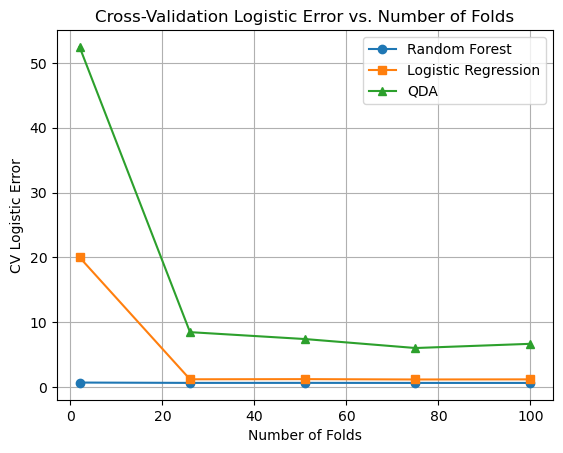

In [200]:
#CV logerr comparsion for dataset1
CV_logerr_comparsion(X1, Y1)

CV_log_error of 2 for <function RandomForest at 0x0000028C97683D80>: 1.8186278088336398
CV_log_error of 2 for <function LogisticRegression at 0x0000028C9DD940E0>: 0.6849527829880384
Covariance matrices:
Class 0 covariance matrix:
[[ 0.98456796  0.44300025  0.17530522]
 [ 0.44300025  8.68773899 -0.93330068]
 [ 0.17530522 -0.93330068 13.80852616]]
Class 1 covariance matrix:
[[ 1.40327482 -1.05744321  0.48527123]
 [-1.05744321  7.81560692 -0.88148627]
 [ 0.48527123 -0.88148627  4.16035808]]
Covariance matrices:
Class 0 covariance matrix:
[[ 1.21344746  0.44644626 -0.06197786]
 [ 0.44644626 11.05982746 -0.6920405 ]
 [-0.06197786 -0.6920405  12.24226003]]
Class 1 covariance matrix:
[[ 0.79672825  0.0665902  -0.24980134]
 [ 0.0665902  15.80057372 -0.57600765]
 [-0.24980134 -0.57600765 13.08825759]]
CV_log_error of 2 for <function QuadraticDiscriminant at 0x0000028C9DD94400>: 0.8422025753270193
CV_log_error of 2 for <function LDiscriminant at 0x0000028C9DD94360>: 0.6889399041404164
CV_log_err

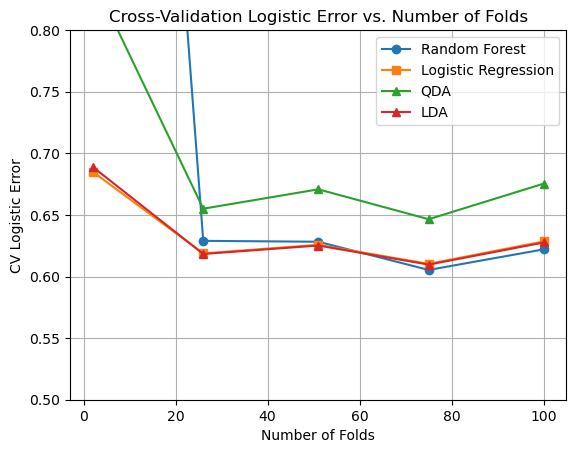

In [82]:
CV_logerr_comparsion(X2, Y2)

CV_log_error of 2 for <function RandomForest at 0x000001D959886160>: 0.7411708041089817
CV_log_error of 2 for <function LogisticRegression at 0x000001D961295BC0>: 0.7459218242587808
CV_log_error of 2 for <function QuadraticDiscriminant at 0x000001D95EF5D300>: 0.7693724269846004
CV_log_error of 26 for <function RandomForest at 0x000001D959886160>: 0.6980881595713758
CV_log_error of 26 for <function LogisticRegression at 0x000001D961295BC0>: 0.710147841182951
CV_log_error of 26 for <function QuadraticDiscriminant at 0x000001D95EF5D300>: 0.6950763222291243
CV_log_error of 51 for <function RandomForest at 0x000001D959886160>: 0.6931717984188136
CV_log_error of 51 for <function LogisticRegression at 0x000001D961295BC0>: 0.702362372872637
CV_log_error of 51 for <function QuadraticDiscriminant at 0x000001D95EF5D300>: 0.7093658113336909
CV_log_error of 75 for <function RandomForest at 0x000001D959886160>: 0.6829350132035822
CV_log_error of 75 for <function LogisticRegression at 0x000001D961295

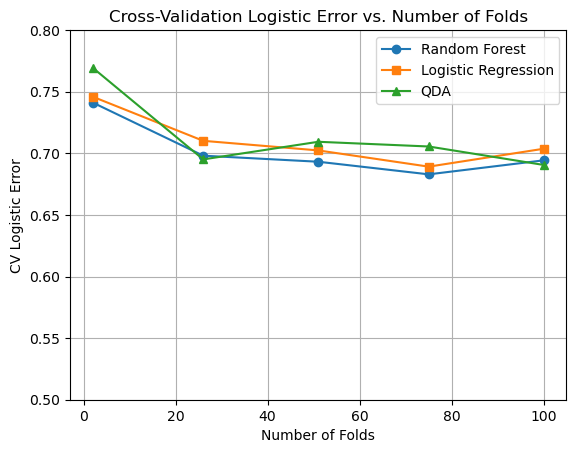

In [304]:
CV_logerr_comparsion(X3, Y3)

CV_log_error of 2 for <function RandomForest at 0x000001D959886160>: 0.5835018622672887
CV_log_error of 2 for <function LogisticRegression at 0x000001D961295BC0>: 0.6381091253223292
CV_log_error of 2 for <function QuadraticDiscriminant at 0x000001D95EF5D300>: 1.7167211888155682
CV_log_error of 26 for <function RandomForest at 0x000001D959886160>: 0.594708460180123
CV_log_error of 26 for <function LogisticRegression at 0x000001D961295BC0>: 0.6087955619908637
CV_log_error of 26 for <function QuadraticDiscriminant at 0x000001D95EF5D300>: 0.9170565948669834
CV_log_error of 51 for <function RandomForest at 0x000001D959886160>: 0.5994641720253007
CV_log_error of 51 for <function LogisticRegression at 0x000001D961295BC0>: 0.6210336725844265
CV_log_error of 51 for <function QuadraticDiscriminant at 0x000001D95EF5D300>: 0.8804620804012634
CV_log_error of 75 for <function RandomForest at 0x000001D959886160>: 0.6017061419391402
CV_log_error of 75 for <function LogisticRegression at 0x000001D96129

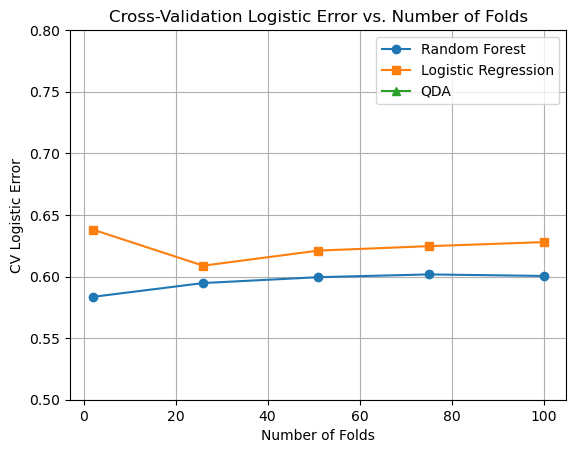

In [306]:
CV_logerr_comparsion(X4, Y4)

In [294]:
#QDA for 2nd dataset
class CustomQDA(QDA):
    def __init__(
        self,
        custom_covariances=None,
        priors=None,
        reg_param=0.0,
        store_covariance=True,
        tol=1.0e-4,
    ):
        super().__init__(priors=priors, reg_param=reg_param, store_covariance=store_covariance, tol=tol)
        self.custom_covariances = custom_covariances

    def fit(self, X, y):
        # Call the original fit method to compute means and priors
        super().fit(X, y)
        
        if self.custom_covariances is not None:
            # Ensure the number of covariance matrices matches the number of classes
            if len(self.custom_covariances) != len(self.classes_):
                raise ValueError("Number of custom covariance matrices must match the number of classes.")
            
            # Replace the covariance matrices
            self.covariance_ = self.custom_covariances
            print("Custom covariance matrices have been applied.")
        return self

def QDA_dataset2(X,Y,X_test=None):
    
    cov_class_0 = np.array([[40.0, 50.0, 80.0], [0.0, 10.0, 1000000.0], [0.0, 0.0, 10.0]])
    cov_class_1 = np.array([[1.0, 0.0, 80.0], [9.0, 10.0, 0.0], [0.0, 0.0, 10.0]])
    custom_covariances = [cov_class_0, cov_class_1]
    
    # Initialize and fit the Custom QDA
    qda = CustomQDA(custom_covariances=custom_covariances, store_covariance=True)
    qda.fit(X, Y)

    for i, cov in enumerate(qda.covariance_):
        print(f"Class {i} covariance matrix:\n{cov}")
    if X_test is not None:
        probs_test = qda.predict_proba(X_test)
        for i, cov in enumerate(qda.covariance_):
            print(f"Class {i} covariance matrix:\n{cov}")
        positive_probs_test = probs_test[:, 1]
        negative_probs_test = probs_test[:, 0]
        negative_probs_test[negative_probs_test == 0] = 1e-9
        positive_probs_test[positive_probs_test == 0] = 1e-9
        log_odds_test = np.log(positive_probs_test/negative_probs_test)
        log_odds_test[positive_probs_test == 1] = 99 
        log_odds_test[positive_probs_test == 1e-9] = -99
        #returns log odds as a vector with value for each x_test
        return log_odds_test